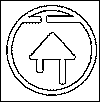

In [5]:
from PIL import Image, ImageFilter, ImageOps
from IPython.display import display
import numpy as np

def resize_based_on_width(im, basewidth = 100):
    wpercent = (basewidth / float(im.size[0]))
    hsize = int((float(im.size[1]) * float(wpercent)))
    im = im.resize((basewidth, hsize))
    return im

with Image.open("test.jpg") as im:
    im = resize_based_on_width(im)
    im = im.quantize(10)
    im = im.convert("L")
    im = im.filter(ImageFilter.FIND_EDGES)
    im = ImageOps.invert(im)
    # im = im.point( lambda p: 255 if p > 150 else 0 )
    im = im.convert('1')
    a = np.asarray(im)
    display(im)

[[False False False ... False False False]
 [False  True  True ...  True  True False]
 [False  True  True ...  True  True False]
 ...
 [False  True  True ...  True  True False]
 [False  True  True ...  True  True False]
 [False False False ... False False False]]


C:\Users\Asus\AppData\Local\Temp\ipykernel_29720\2664673490.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = im.resize((basewidth, hsize), Image.ANTIALIAS)


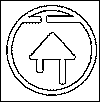

In [6]:
print(a)
basewidth = 300
wpercent = (basewidth / float(im.size[0]))
hsize = int((float(im.size[1]) * float(wpercent)))
img = im.resize((basewidth, hsize), Image.ANTIALIAS)
display(im)
im = Image.fromarray(a, mode='L')


In [7]:
def make_line(a, gap, target_color):
    dotted_line = []
    head = None
    for i in range(len(a) - 1):
        if head is None and a[i] == target_color:
            head = i
        if head is not None and a[i + 1] != target_color:
            tail = i
            dotted_line += [(head * gap, (tail + 1) * gap)]
            head = None
        if i == len(a) - 2 and a[i + 1] == target_color:
            if head is None:
                head = i + 1
            tail = i + 1
            dotted_line += [(head * gap, (tail + 1) * gap)]
    return dotted_line


def make_lines(a, gap=1, target_color=False):
    dotted_lines = []
    for a_ in a:
        dotted_lines += [make_line(a_, gap, target_color)]
    return dotted_lines


In [8]:
lines = make_lines(a)
%store lines
print(lines)

Stored 'lines' (list)
[[(0, 100)], [(0, 1), (99, 100)], [(0, 1), (99, 100)], [(0, 1), (99, 100)], [(0, 1), (99, 100)], [(0, 1), (44, 45), (46, 58), (59, 60), (99, 100)], [(0, 1), (39, 47), (57, 64), (99, 100)], [(0, 1), (37, 40), (41, 42), (61, 63), (64, 67), (99, 100)], [(0, 1), (34, 38), (66, 70), (99, 100)], [(0, 1), (32, 34), (68, 72), (99, 100)], [(0, 1), (30, 33), (43, 57), (58, 60), (71, 73), (99, 100)], [(0, 1), (28, 31), (40, 46), (57, 63), (72, 76), (99, 100)], [(0, 1), (27, 28), (38, 42), (62, 66), (75, 77), (99, 100)], [(0, 1), (25, 28), (35, 39), (65, 69), (76, 78), (99, 100)], [(0, 1), (24, 26), (33, 36), (68, 70), (77, 80), (99, 100)], [(0, 1), (22, 25), (31, 34), (47, 73), (79, 81), (99, 100)], [(0, 1), (21, 23), (28, 41), (46, 47), (48, 74), (80, 82), (99, 100)], [(0, 1), (20, 22), (29, 30), (40, 41), (46, 47), (81, 83), (99, 100)], [(0, 1), (19, 21), (41, 42), (46, 47), (82, 84), (99, 100)], [(0, 1), (18, 20), (40, 42), (46, 47), (83, 85), (99, 100)], [(0, 1), (18, 19